In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from IPython.display import display, HTML
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
datadir = thisdir + 'datasets_for_analysis/'

print('ok')

ok


In [2]:
df = pandas.read_csv(datadir+'reinvestment_by_census_tract_for_smallest_businesses.csv', encoding='utf-8')#, index_col=['census_tract', 'activity_year'])
census_tract_list = df['census_tract'].dropna().drop_duplicates().sort_values().tolist()

census_tracts_df = pandas.DataFrame(census_tract_list, columns=['census_tract'])
census_tracts_df = census_tracts_df.set_index('census_tract')
census_tracts_df = census_tracts_df.assign(nYears = df.groupby('census_tract').size())

loan_columns = [x for x in df.columns.tolist() if (('nLoans' in x or 'amtLoans' in x or 'nWorking' in x or 'amtWorking' in x) and ('per_sbjob' not in x))]

census_tracts_df = census_tracts_df.join(df.groupby('census_tract')[loan_columns].sum(), how='left')

census_tracts_df = census_tracts_df.join(df[['census_tract', 'Number of jobs for workers at firms with Firm Size: 0-19 Employees']][df['activity_year'] == 2015].set_index('census_tract'), how='left')
census_tracts_df = census_tracts_df.rename(columns = {'Number of jobs for workers at firms with Firm Size: 0-19 Employees': 'sbjobs_2015'})
census_tracts_df = census_tracts_df.join(df[['census_tract', 'income_group_code', 'income_group', 'cra_level']][df['activity_year'] == 2017].set_index('census_tract'), how='left')

cra_level_df = pandas.DataFrame(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('cra_level').size(), columns=['nTracts'])
cra_level_df = cra_level_df.join(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('cra_level')[loan_columns].sum(), how='left')
cra_level_df = cra_level_df.join(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('cra_level')['sbjobs_2015'].sum(), how='left')

cra_level_df = cra_level_df.assign(nLoans1_per_sbjob = cra_level_df['nLoans1'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(amtLoans1_adj_per_sbjob = cra_level_df['amtLoans1_adj'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(nLoans100k_per_sbjob = cra_level_df['nLoans100k'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(amtLoans100k_adj_per_sbjob = cra_level_df['amtLoans100k_adj'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(nLoans250k_per_sbjob = cra_level_df['nLoans250k'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(amtLoans250k_adj_per_sbjob = cra_level_df['amtLoans250k_adj'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(nLoansToSmallest_per_sbjob = cra_level_df['nLoansToSmallest'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(amtLoansToSmallest_adj_per_sbjob = cra_level_df['amtLoansToSmallest_adj'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(nLoansTotal_per_sbjob = cra_level_df['nLoansTotal'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(amtLoansTotal_adj_per_sbjob = cra_level_df['amtLoansTotal_adj'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(nWorkingLoans_per_sbjob = cra_level_df['nWorkingLoans'] / cra_level_df['sbjobs_2015'])
cra_level_df = cra_level_df.assign(amtWorkingLoans_adj_per_sbjob = cra_level_df['amtWorkingLoans_adj'] / cra_level_df['sbjobs_2015'])

print('backing up...')
cra_level_df_bk = cra_level_df
print('ok')


backing up...
ok


retrieving from backup...


CRA level,Tracts,Amount of working loans,Small business jobs,Amt working loans per sb job
low,77,"$435,503,551","7,617","$57,175"
middle,27,"$535,115,476","9,443","$56,668"
moderate,61,"$451,566,089","8,988","$50,241"
upper,18,"$340,691,128","6,202","$54,932"


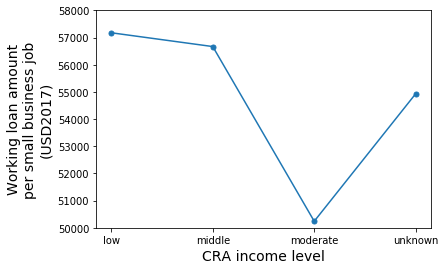

In [3]:
print('retrieving from backup...')
cra_level_df = cra_level_df_bk
thehtml = '<table>'
thehtml += '<tr><th>CRA level</th><th>Tracts</th><th>Amount of working loans</th><th>Small business jobs</th><th>Amt working loans per sb job</th></tr>'


for ix, thisrow in cra_level_df.iterrows():
    if (ix != 'unknown'):
        thehtml += '<tr>'
        thehtml += '<td>{0:}</td>'.format(ix)
        thehtml += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
        thehtml += '<td>${0:,.0f}</td>'.format(thisrow['amtWorkingLoans_adj'])
        thehtml += '<td>{0:,.0f}</td>'.format(thisrow['sbjobs_2015'])
        thehtml += '<td>${0:,.0f}</td>'.format(thisrow['amtWorkingLoans_adj_per_sbjob'])
        thehtml += '</tr>'
thehtml += '</table>'

display(HTML(thehtml))

fig, ax = plt.subplots(1,1)
cra_level_df[cra_level_df.index != 'unknown'].plot(y = 'amtWorkingLoans_adj_per_sbjob', ax=ax, marker='.', ms=10)
#plt.xticks(cra_level_df.index.values.tolist())
plt.xlabel('CRA income level', fontsize=14)
plt.xticks(np.arange(0,4), cra_level_df.index.tolist())
plt.ylim([50000,58000])
plt.ylabel('Working loan amount\nper small business job\n(USD2017)', fontsize=14)
ax.get_legend().remove()
plt.show()


    

In [5]:
census_tracts_df.columns

Index(['nYears', 'nLoans1', 'amtLoans1', 'nLoans100k', 'amtLoans100k',
       'nLoans250k', 'amtLoans250k', 'nLoansToSmallest', 'amtLoansToSmallest',
       'nLoansTotal', 'amtLoansTotal', 'nWorkingLoans', 'amtWorkingLoans',
       'amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj',
       'amtLoansToSmallest_adj', 'amtLoansTotal_adj', 'amtWorkingLoans_adj',
       'sbjobs_2015', 'income_group_code', 'income_group', 'cra_level'],
      dtype='object')

In [ ]:

#print('backing up...')
df = df[[x for x in df.columns.tolist() if 'per_sbjob' not in x]]
#df = df[df.columns.tolist()[:-26]]

reference_columns = ['census_tract', 'activity_year']

cra_info_columns = ['CSA2010', 'income_group_code', 'income_group', 'cra_level']

loan_columns = [x for x in df.columns.tolist() if ('nLoans' in x or 'amtLoans' in x)]

get_columns = reference_columns + cra_info_columns + loan_columns

print('backing up...')
df_bk = df
print('ok')
#df[get_columns]




In [ ]:
print('getting from backup...') 
df = df_bk

#in2015_df = df[['census_tract', 'CSA2010', 'income_group_code', 'income_group', 'cra_level', 'Number of jobs for workers at firms with Firm Size: 0-19 Employees']][
#    df['activity_year'] == 2015
#].set_index('census_tract')

in2015_df.index.tolist()


In [ ]:

df.columns.tolist()
#df.set_index('census_tract').join(in2015_df, how='left')

columns_to_sum = ['nLoans1', 'amtLoans1', 'nLoans100k', 'amtLoans100k', 'nLoans250k', 'amtLoans250k']
columns_to_sum += ['nLoansToSmallest', 'amtLoansToSmallest', 'nLoansTotal', 'amtLoansTotal', 'nWorkingLoans', 'amtWorkingLoans']
columns_to_sum += ['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj', 'amtLoansToSmallest_adj']
columns_to_sum += ['amtLoansTotal_adj', 'amtWorkingLoans_adj']

summed_df = df.groupby('census_tract')[columns_to_sum].sum().join(in2015_df, how='left')

summed_df = summed_df.rename(columns={'income_group_code': 'income_group_code_2015', 'income_group': 'income_group_2015', 'cra_level': 'cra_level_2015', 'Number of jobs for workers at firms with Firm Size: 0-19 Employees': 'sbjobs2015'})
summed_df = summed_df.assign(nLoans1_per_sbjob = summed_df['nLoans1'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoans1_adj_per_sbjob = summed_df['amtLoans1_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoans100k_per_sbjob = summed_df['nLoans100k'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoans100k_adj_per_sbjob = summed_df['amtLoans100k_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoans250k_per_sbjob = summed_df['nLoans250k'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoans250k_adj_per_sbjob = summed_df['amtLoans250k_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoansToSmallest_per_sbjob = summed_df['nLoansToSmallest'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoansToSmallest_adj_per_sbjob = summed_df['amtLoansToSmallest_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoansTotal_per_sbjob = summed_df['nLoansTotal'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoansTotal_adj_per_sbjob = summed_df['amtLoansTotal_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nWorkingLoans_per_sbjob = summed_df['nWorkingLoans'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtWorkingLoans_adj_per_sbjob = summed_df['amtWorkingLoans_adj'] / summed_df['sbjobs2015'])

summed_df['nLoans1_per_sbjob'].dropna()


    

In [ ]:


cra_level_df = pandas.DataFrame(summed_df.groupby('cra_level_2015').size(), columns=['nTracts'])

cra_level_df = cra_level_df.assign(nLoans1_per_sbjob = summed_df.groupby('cra_level_2015')['nLoans1_per_sbjob'].sum())
'''
cra_level_df = cra_level_df.assign(nLoans100k = df.groupby('cra_level')['nLoans100k'].sum())
cra_level_df = cra_level_df.assign(nLoans250k = df.groupby('cra_level')['nLoans250k'].sum())
cra_level_df = cra_level_df.assign(nLoansToSmallest = df.groupby('cra_level')['nLoansToSmallest'].sum())
cra_level_df = cra_level_df.assign(nLoansTotal = df.groupby('cra_level')['nLoansTotal'].sum())
cra_level_df = cra_level_df.assign(nWorkingLoans = df.groupby('cra_level')['nWorkingLoans'].sum())#

cra_level_df = cra_level_df.assign(amtLoans1_adj = df.groupby('cra_level')['amtLoans1_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoans100k_adj = df.groupby('cra_level')['amtLoans100k_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoans250k_adj = df.groupby('cra_level')['amtLoans250k_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoansToSmallest_adj = df.groupby('cra_level')['amtLoansToSmallest_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoansTotal_adj = df.groupby('cra_level')['amtLoansTotal_adj'].sum())
cra_level_df = cra_level_df.assign(amtWorkingLoans_adj = df.groupby('cra_level')['amtWorkingLoans_adj'].sum())

cra_level_df = cra_level_df.drop('unknown', axis=0)
'''
cra_level_df



In [ ]:

cra_level_df = cra_level_df.assign(sbjobs = df.groupby('cra_level')['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].sum())

cra_level_df = cra_level_df.assign(nLoans1_per_sbjob = cra_level_df['nLoans1'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoans100k_per_sbjob = cra_level_df['nLoans100k'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoans250k_per_sbjob = cra_level_df['nLoans250k'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoansToSmallest_per_sbjob = cra_level_df['nLoansToSmallest'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoansTotal_per_sbjob = cra_level_df['nLoansTotal'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nWorkingLoans_per_sbjob = cra_level_df['nWorkingLoans'] / cra_level_df['sbjobs'])

cra_level_df = cra_level_df.assign(amtLoans1_adj_per_sbjob = cra_level_df['amtLoans1_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoans100k_adj_per_sbjob = cra_level_df['amtLoans100k_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoans250k_adj_per_sbjob = cra_level_df['amtLoans250k_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoansToSmallest_adj_per_sbjob = cra_level_df['amtLoansToSmallest_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoansTotal_adj_per_sbjob = cra_level_df['amtLoansTotal_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtWorkingLoans_adj_per_sbjob = cra_level_df['amtWorkingLoans_adj'] / cra_level_df['sbjobs'])

cra_level_df = cra_level_df.drop('unknown', axis=0)

print('Done!')
#amtLoans1_adj	amtLoans100k_adj	amtLoans250k_adj	amtLoansToSmallest_adj	amtLoansTotal_adj